In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] 

In [4]:
df = pd.read_csv('.\\shenzhen.csv')
df.head()

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,hourseType,hourseSize,direction,fitment
0,0,罗湖区,满五红本， 户型方正朝南，自住装修保养好，花园社区,金城华庭,螺岭,房本满五年,710.0,79552.0,3室1厅,89.25,南,精装
1,1,罗湖区,7号线洪湖站前59万平洪湖公园后京基水贝*2个万象城,洪湖东岸,翠竹,房本满五年,408.0,54736.0,3室1厅,74.54,西,精装
2,2,罗湖区,《供电南苑。复式三层四房户型》万象城，地理位置优越,供电南苑,万象城,房本满五年,850.0,67649.0,4室1厅,125.65,西,简装
3,3,罗湖区,不用明额 满两年红本 高层东南三房 有钥匙随时可看,翡翠公寓,翠竹,房本满五年,360.0,60627.0,3室2厅,59.38,南,精装
4,4,罗湖区,都市名园 2室1厅 370万,都市名园,万象城,NaN,370.0,48259.0,2室1厅,76.67,东北,简装


In [5]:
df.describe() 

,Unnamed: 0,total_price,unit_price,hourseSize
count,18907.000000,18907.000000,18907.000000,18907.000000
mean,9453.000000,686.988634,64893.523721,100.622215
std,5458.125105,621.063940,25713.800191,95.858442
min,0.000000,24.000000,506.000000,13.150000
25%,4726.500000,345.000000,46263.500000,66.830000
50%,9453.000000,505.000000,59441.000000,88.260000
75%,14179.500000,786.000000,78108.000000,121.065000
max,18906.000000,8800.000000,225635.000000,10871.000000


In [6]:
df[df['hourseSize']>10000]

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,hourseType,hourseSize,direction,fitment
12546,12546,宝安区,弘雅二期花园中间，中间楼层，满五年，红本在手,弘雅花园第二期,新安,房本满五年,550.0,506.0,3室2厅,10871.0,东南,其他


In [22]:
df.drop(df[df['hourseSize']>1000].index,inplace=True)
df[df['hourseSize']>10000]   #确认是否正确删除

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,hourseType,hourseSize,direction,fitment


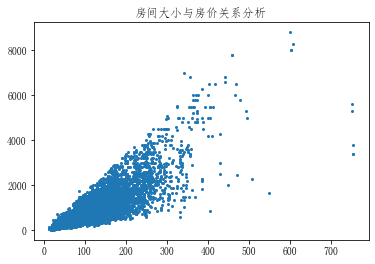

In [23]:
plt.title("房间大小与房价关系分析")
plt.scatter(df['hourseSize'],df['total_price'],s=4)
plt.show()

In [24]:
#查看每列的总数、数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18906 entries, 0 to 18906
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   18906 non-null  int64  
 1   area         18906 non-null  object 
 2   title        18898 non-null  object 
 3   community    18906 non-null  object 
 4   position     18906 non-null  object 
 5   tax          10710 non-null  object 
 6   total_price  18906 non-null  float64
 7   unit_price   18906 non-null  float64
 8   hourseType   18906 non-null  object 
 9   hourseSize   18906 non-null  float64
 10  direction    18906 non-null  object 
 11  fitment      18906 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.9+ MB


In [8]:
df[df.duplicated()]

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,hourseType,hourseSize,direction,fitment


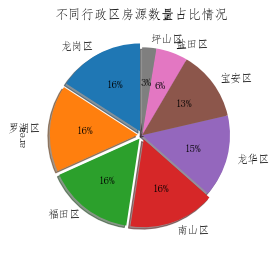

In [31]:
area_house_count = df.groupby('area')['area'].count()
area_house_count.sort_values(ascending=False,inplace=True) 
fig=plt.figure(figsize=(10,8),dpi=80)
ax1=fig.add_subplot(2,2,1) 
plt.title("不同行政区房源数量占比情况")
area_house_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0.05,0.05,0.05,0.05,0,0,0,0],labeldistance=1.1,startangle=90)


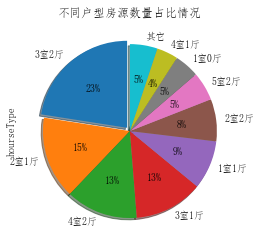

In [32]:
hourseType_count = df.groupby('hourseType')['hourseType'].count()
hourseType_count.sort_values(ascending=False,inplace=True) 
new_hourseType_count = hourseType_count[hourseType_count>700]
new_hourseType_count['其它'] = hourseType_count[hourseType_count<700].sum()
ax2=fig.add_subplot(2,2,2)
plt.title("不同户型房源数量占比情况")
new_hourseType_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0.05,0,0,0,0,0,0,0,0,0],labeldistance=1.1,startangle=90)


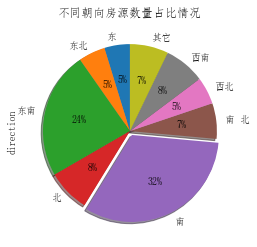

In [33]:
direction_count = df.groupby('direction')['direction'].count()  
new_direction_count =direction_count[direction_count>800]
new_direction_count['其它'] = direction_count[direction_count<800].sum()
new_direction_count.sort_values(ascending=False)
ax3=fig.add_subplot(2,2,3)
plt.title("不同朝向房源数量占比情况")
new_direction_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0,0,0,0,0.05,0,0,0,0],labeldistance=1.1,startangle=90)


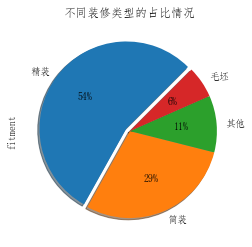

In [34]:
fitment_count = df.groupby('fitment')['fitment'].count().sort_values(ascending=False)
fitment_count.sort_values(ascending=False,inplace=True)
ax4=fig.add_subplot(2,2,4)
plt.title("不同装修类型的占比情况")
fitment_count.plot.pie(shadow=True,autopct='%0.f%%',labeldistance=1.1,explode=[0.05,0,0,0],startangle=45) 
plt.show()

In [36]:
area_house_mean_totalprice = df.groupby('area')['total_price'].mean()
area_house_mean_totalprice.sort_values(ascending=False,inplace=True)
area_house_mean_totalprice

area
南山区    1055.371167
宝安区     815.907730
福田区     757.017633
龙华区     687.321865
盐田区     517.372137
罗湖区     478.523033
龙岗区     474.388533
坪山区     318.978323
Name: total_price, dtype: float64

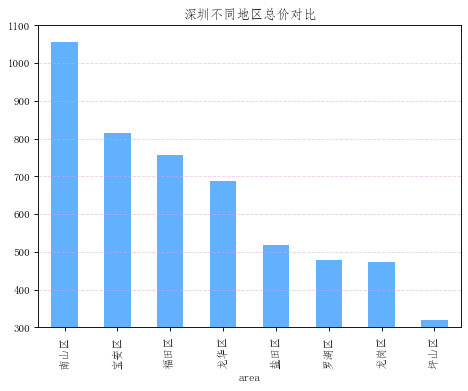

In [37]:
fig = plt.figure(figsize=(15,5),dpi=80)
ax1 = fig.add_subplot(1,2,1)
plt.title("深圳不同地区总价对比")
plt.ylim([300,1100])  
rects = area_house_mean_totalprice.plot.bar(alpha=0.7,color='#1E90FF')
plt.grid(alpha=0.5,color='#DDA0DD',linestyle='--',axis='y')

In [12]:
area_house_mean_unitprice = df.groupby('area')['unit_price'].mean()
area_house_mean_unitprice.sort_values(ascending=False,inplace=True)
area_house_mean_unitprice

area
南山区    92239.793667
福田区    77030.074333
宝安区    67798.995094
龙华区    60516.629759
罗湖区    57632.523000
盐田区    49925.460775
龙岗区    44816.287667
坪山区    35425.415133
Name: unit_price, dtype: float64

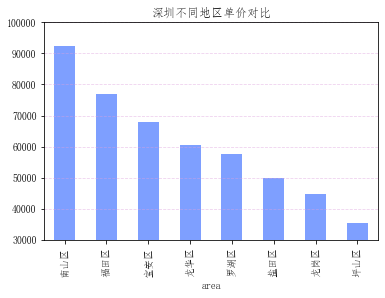

In [38]:
ax2 = fig.add_subplot(1,2,2)
plt.title("深圳不同地区单价对比")
plt.ylim([30000,100000])
area_house_mean_unitprice.plot.bar(alpha=0.7,color='#4876FF')
plt.grid(alpha=0.5,color='#DDA0DD',linestyle='--',axis='y')
plt.show()

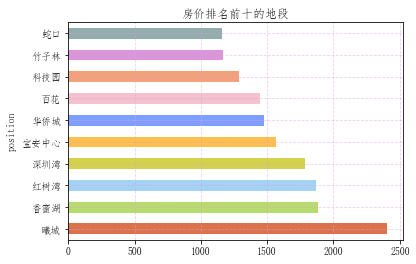

In [14]:
position_house_mean_price = df.groupby('position')['total_price'].mean()
position_house_mean_price.sort_values(ascending=False,inplace=True)
plt.title("房价排名前十的地段")
position_house_mean_price.head(10).plot.barh(alpha=0.7,color=['#CD3700','#9ACD32','#7EC0EE','y','orange','#4876FF','#EEA9B8','#EE7942','#CD69C9','#668B8B'])
plt.grid(color='#DDA0DD',linestyle='--',alpha=0.5)
plt.show()

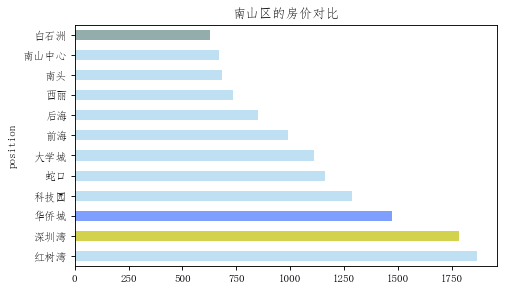

In [40]:
area_nanshan_price = df[df['area']=='南山区'].groupby('position')['total_price'].mean()
area_nanshan_price.sort_values(ascending=False,inplace=True)
fig = plt.figure(figsize=(15,4),dpi=80)
ax1 = fig.add_subplot(1,2,1)
plt.title("南山区的房价对比")
area_nanshan_price.plot.barh(alpha=0.7,color=['#A4D3EE','y','#4876FF','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#668B8B']) 

C:\Users\siri\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


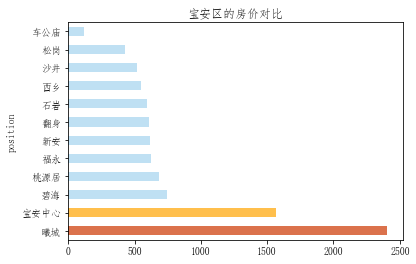

In [39]:

area_baoan_price = df[df['area']=='宝安区'].groupby('position')['total_price'].mean()
area_baoan_price.sort_values(ascending=False,inplace=True)
#area_baoan_price
ax2 = fig.add_subplot(1,2,2)
plt.title("宝安区的房价对比")
area_baoan_price.plot.barh(alpha=0.7,color=['#CD3700','orange','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE']) 
plt.show()

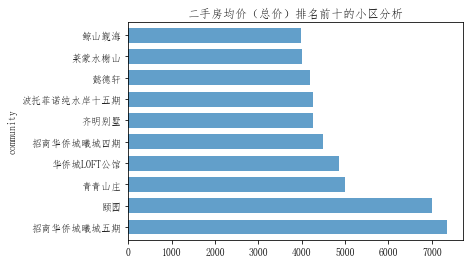

In [16]:
community_top10 = df.groupby('community')['total_price'].mean().sort_values(ascending=False).head(10)
plt.title("二手房均价（总价）排名前十的小区分析")
community_top10.plot.barh(alpha=0.7,width=0.7)
plt.show()

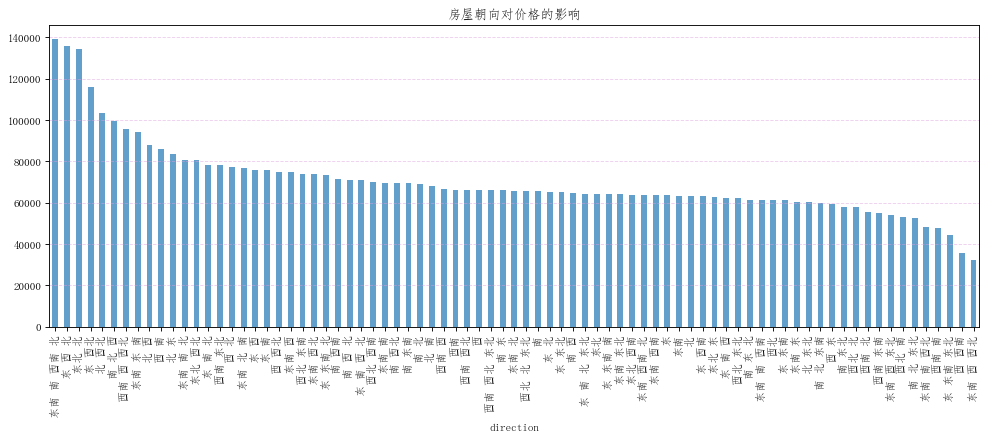

In [17]:
direction_unit_price = df.groupby('direction')['unit_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,5),dpi=80)
plt.title("房屋朝向对价格的影响")
direction_unit_price.plot.bar(alpha=0.7)
plt.grid(color='#DDA0DD',linestyle='--',alpha=0.5,axis='y')
plt.show()

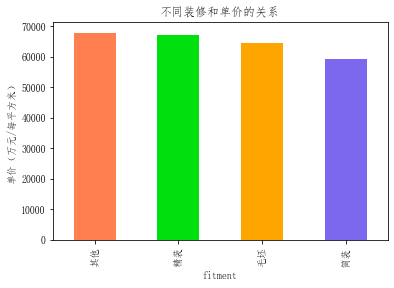

In [18]:
fit_price = df.groupby('fitment')['unit_price'].mean().sort_values(ascending=False)
plt.title("不同装修和单价的关系")
plt.ylabel("单价（万元/每平方米）")
fit_price.plot.bar(color=['#FF7F50','#00E00D','#FFA500','#7B68EE'])
plt.show()

C:\Users\siri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\siri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


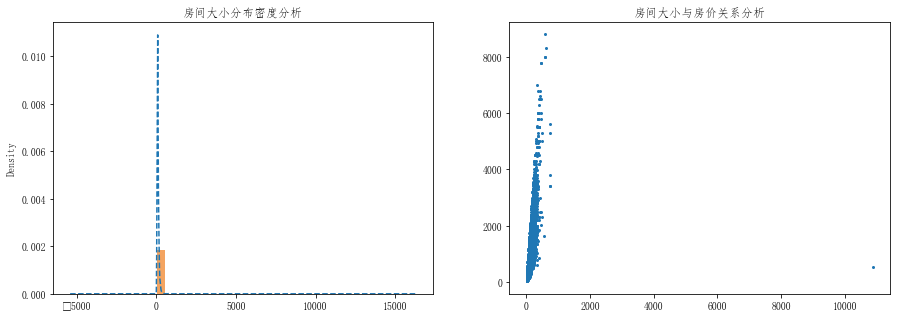

In [19]:
# 通过密度图和散点图来分析房屋特征
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
plt.title("房间大小分布密度分析")
df['hourseSize'].hist(bins=20,ax=ax1,color='#F4A460',density= True)  #直方图  desity=True显示频率，为False显示频数
df['hourseSize'].plot(kind='kde',style='--',ax=ax1)     #折线图 kind='kde'(是与直方图相关的密度图)
ax2 = fig.add_subplot(1,2,2)
plt.title("房间大小与房价关系分析")
plt.scatter(df['hourseSize'],df['total_price'],s=4)
plt.show()

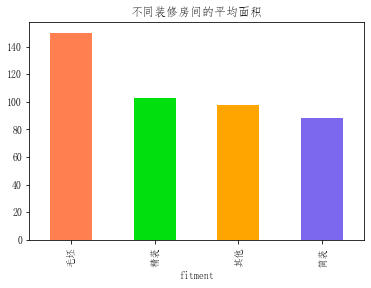

In [20]:
fit_average_size = df.groupby('fitment')['hourseSize'].mean().sort_values(ascending=False)
fit_average_size 
plt.title("不同装修房间的平均面积")
# plt.ylable("面积（平米）")
fit_average_size .plot.bar(color=['#FF7F50','#00E00D','#FFA500','#7B68EE'])
plt.show()

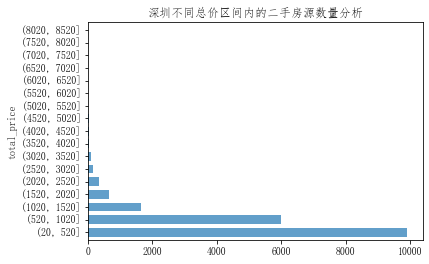

In [21]:
bins_arr = np.arange(20,9000,500)
bins = pd.cut(df['total_price'],bins_arr)
totalprice_counts = df['total_price'].groupby(bins).count()

plt.title("深圳不同总价区间内的二手房源数量分析")
plt.ylabel("二手房数量")
totalprice_counts.plot.barh(alpha=0.7,width=0.7) 
plt.show()